# João Gonçalves, 51268

# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 9-November-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* The notebook should be delivered with the outputs already available


# Group I 

Nowadays, industry players are using product quality certifications to promote their products.
Vital factor in red wine certification and quality assessment is physicochemical tests, which
are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical
properties. We would like to determine which feature(s) can be used regression that
best predicts the quality red wine.

Structure of the dataset:
Input variables (based on physicochemical tests):
- Fixed Acidity: Most acids involved with wine or fixed or non-volatile (do not evaporate readily)
- Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- Citric Acid: Often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes
- Residual Sugar: From the natural grape sugars left in a wine after the alcoholic fermentation finishes.
- Chlorides: The amount of salt in the wine
- Free Sulfur Dioxide: It prevents microbial growth and the oxidation of wine
- Total Sulfur Dioxide: The amount of free + bound forms of SO₂
- Density: Sweeter wines have a higher density
- pH: Describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
- Alcohol: Available in small quantities in wines makes the drinkers sociable
- Sulphates: A wine additive that contributes to SO₂ levels and acts as an antimicrobial and antioxidant
- Quality: which is the output variable/predictor

The dataset source is taken from https://archive.ics.uci.edu/ml/datasets/wine+quality.


In [155]:
# This code cell does not need to be changed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

dataFileName = "winequality-red.csv"
dataDF = pd.read_csv(dataFileName)

dataDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Question 1 (1 point out of 20)

Identify the variables that are more linearly correlated with the quality of red wine

In [156]:
corrmat = dataDF.corr().abs()
pearson = corrmat['quality']
pearson.sort_values(axis = 0, ascending = False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

## Question 2 ( 2 points out of 20)

Estimate the true error of a model that uses the top 4 variables more correlated with the quality of red wine

In [157]:
def regression_f(input, price):
    model = linear_model.LinearRegression()
    return -1*cross_val_score(model, input, price, scoring='neg_mean_squared_error', cv=10).mean()


test_error = regression_f(dataDF[['alcohol', 'volatile acidity', 'sulphates','citric acid']], dataDF[['quality']])
print(f'Estimated true error (test error): {test_error}')

Estimated true error (test error): 0.4439518038537466


## Question 3 ( 4 points out of 20)

Evaluate two other models of your choice and compare/discuss their expected errors? (explain your criteria for each model tested)

In [158]:
def regression_f(input, price):
    model = linear_model.LinearRegression()
    return -1*cross_val_score(model, input, price, scoring='neg_mean_squared_error', cv=10).mean()


test_error = regression_f(dataDF.drop(['quality'], axis = 1), dataDF[['quality']])
print(f'Estimated true error (test error): {test_error}')

Estimated true error (test error): 0.43518490403009225


In [159]:
polynomial_features = PolynomialFeatures(degree = 3)
test_error = regression_f(polynomial_features.fit_transform(dataDF[['alcohol', 'volatile acidity']]), dataDF[['quality']])
print(f'Estimated true error (test error): {test_error}')

Estimated true error (test error): 0.44767964768428314


## Answer

In question 2, I created a model that uses the top 4 variables more correlated with the guality of red wine, and in question 3 I want to create two other models that can be compared to the first one. One way to do that would be to create a second model which is also a multiple linear regression with all the features, and a third model that is a polynomial regression with the 2 most correlated features. Looking at the true error values of each model, I see that the multiple linear regression using all features is the one with a lower one, for that reason, that is the better model we have.

## Question 4 ( 3 points out of 20)

Based on the best model identified previously, build a final model, report the formula (coefficients found) and evaluate it. On average, how far is your predictions from the actual values?

The Coefficients are: [[ 2.72432239e-02 -1.03435127e+00 -1.74033092e-01  1.51390982e-02
  -1.81062782e+00  4.22993833e-03 -3.29586903e-03 -1.71297726e+01
  -3.93833264e-01  8.33810797e-01  2.71436753e-01]]
The Intercept is: [21.20140325]

Test error: 0.49418602858026867


Text(0, 0.5, 'Residual Value')

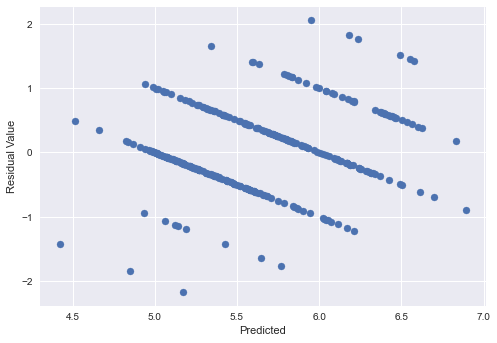

In [168]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


seed = 40
df_tmp = dataDF.copy()

train_set, test_set = train_test_split(df_tmp, test_size = 0.2, random_state = seed)

model = linear_model.LinearRegression()
model.fit(train_set.drop(['quality'], axis = 1), train_set[['quality']])

print("The Coefficients are: ", model.coef_, "\n", "The Intercept is: ", model.intercept_,"\n", sep='')

# Apply model to Training Set
y_pred_test = model.predict(test_set.drop(['quality'], axis = 1))

error_test = mean_absolute_error(y_pred_test, test_set[['quality']])
print("Test error:", error_test)
residualssssss = test_set[['quality']] - y_pred_test

plt.scatter(y_pred_test, residualssssss)
plt.xlabel('Predicted')
plt.ylabel('Residual Value') 

## Answer

To evaluate the model that has the lowest true error we calculated the residual to check how fat the predictions were from the real values.
As we can see above there shouldn't be any clear patters on the residuals, so it means that we can improve our model.
The model that I created fails to predict the quality of the wine, it might be happening because I'm excluding an important input and that therefore the residuals will follow the behavior of that missing inputs. However, the model we have is using all of the features related to the quality of red wine, and therefore it isn't excluding one variable.
Taking all in consideration, the explanation could be that we would need another variable that is more correlated with the quality that is not in the dataset. However with the dataset my model is the one with the lowest true error, so that means that it is the best model with the variables that we have.
On average, my predictions fail to be equal to the actual values by approximately 0.494. Since that the error is close to zero we can conlude that the values predicted are close to the real values meaning that the model is quite good.

# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [161]:
dataFileName = "internet.csv"
dataDF2 = pd.read_csv(dataFileName) #Had to change the name of the df because I run again the 1.4 it doesn't work

In [162]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF2.index
dataset_df['n_users'] = dataDF2['n_users']
x = dataset_df['year']
dataset_df.head()

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248


## Question 1 (5 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

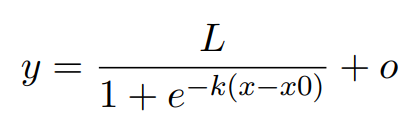

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


Text(0.5, 0, 'Years since 1995')

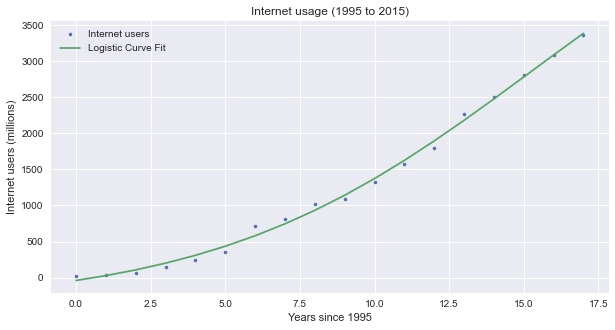

In [163]:
from scipy.optimize import minimize
plt.style.use('seaborn')

data = dataset_df.iloc[:,1]
indexes = np.arange(len(data))

def logistic(x,x0, L, k):
  return L/(1+np.exp(-k*(x - x0)))

def log_cost(params, data):
  x0, L, k, offset = params
  pred = logistic(data.iloc[:,0], x0, L, k) + offset
  return np.mean((pred-data.iloc[:,1]) ** 2)

st_params = [10, 1000, 0.1, -300]
res = minimize(log_cost,st_params, args = (dataset_df))
x0, L, k, offset = res.x

# Used the model found (logistic model with a set of parameters and an offset) to predict the values
pred = logistic(dataset_df.iloc[:,0], x0,L,k) + offset

# Plot the data and the model built
plt.figure(figsize=(10,5))
plt.plot(indexes,data,'.')
plt.plot(indexes,pred)
plt.legend(['Internet users', 'Logistic Curve Fit'])
plt.title("Internet usage (1995 to 2015)")
plt.ylabel("Internet users (millions)")
plt.xlabel("Years since 1995")

In [164]:
res.x

array([ 1.52208524e+01,  6.46199966e+03,  1.88720218e-01, -3.84707853e+02])

The parameters returned mean respectively the 

Midpoint: 1.52208524e+01 – **x0 parameter** \
Change: 6.46199966e+03 – **L parameter** \
Slope factor: 1.88720218e-01 – **k parameter** \
Start: -3.84707853e+02 – **offset parameter**


## Question 2 (2 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Text(0.5, 1.0, 'Residuals')

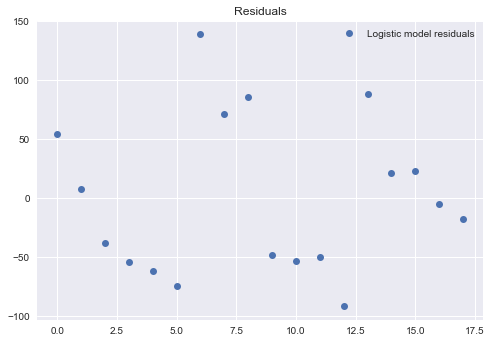

In [165]:
residuals = data - pred

plt.plot(residuals, 'o')
plt.legend(['Logistic model residuals'])
plt.title('Residuals')

Yes beacuse: 
- Logistic curve's fit to be slightly better;
- Has a marginally more normal residual distribution (almost imperceptible);
- Overall, the logistic model can be considered as a good option at at fitting the data.

## Question 3 (3 points out of 20)

Compute the 95% confidence interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

Text(0.5, 0, 'Years since 1995')

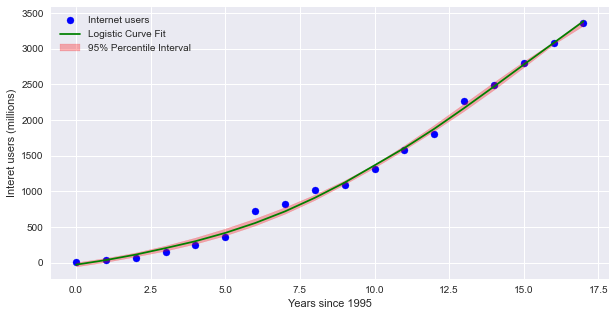

In [166]:
residual = dataset_df.iloc[:,1]-pred

replicas = 10
df_unc = pd.DataFrame()

for _ in range(replicas):
    rep_data = dataset_df.copy() 
    rep_data.iloc[:,1] = pred + residual*np.random.normal(size=dataset_df.shape[0])
    res=minimize(log_cost,st_params,args=(rep_data))
    x0,L,k,offset = res.x
    pred_replica = logistic(dataset_df.iloc[:,0],x0,L,k)+offset
    df_unc =  pd.concat([df_unc, pred_replica], axis=1) 

plt.figure(figsize=(10, 5))

df_unc = df_unc.iloc[:, 1:replicas]
df_unc['median'] = df_unc.quantile(0.5, axis = 1, interpolation = 'midpoint')
df_unc['p2.5'] = df_unc.quantile(0.025, axis = 1,interpolation = 'midpoint')
df_unc['p975'] = df_unc.quantile(0.975, axis = 1,interpolation = 'midpoint')

plt.scatter(dataset_df.iloc[:,0], dataset_df.iloc[:,1], color='blue') 
plt.plot(dataset_df.iloc[:,0], df_unc['median'], color = 'green')
plt.fill_between(dataset_df.iloc[:,0], df_unc[['p2.5']].iloc[:,0], df_unc[['p975']].iloc[:,0], color='red',alpha=0.3)

# As it can be observed, using wild bootstraping the models achieved do not vary to much between them.
plt.legend(['Internet users', 'Logistic Curve Fit', '95% Percentile Interval'])
plt.ylabel("Interet users (millions)")
plt.xlabel("Years since 1995")